In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import datetime
import tqdm
import warnings
import mplfinance as mpf
import yfinance as yf
warnings.filterwarnings("ignore")   #可以将警告信息不显示

In [2]:
# https://blog.csdn.net/GitHub_miao/article/details/140624948

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [38]:
dictionary = r".\database\qfqcombine.pkl"
dt = pd.read_pickle(dictionary)
# tt.to_pickle(r".\database\qfqcombine.pkl")

In [46]:
df = dt.set_index('trade_date').sort_index(ascending=True)
df = df.rename(columns={'amount':'volume'})
# df = df.query("ts_code=='000029.SZ'")

In [47]:
df.tail()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,volume
trade_date,,,,,,,,,,
2021-05-28,002968.SZ,46.18,47.25,45.72,47.03,46.18,0.85,1.8406,5233.75,24554.887
2021-05-28,600822.SH,9.52,9.52,9.38,9.43,9.49,-0.06,-0.6322,10206.39,9640.759
2021-05-28,002058.SZ,7.07,7.16,7.03,7.12,7.06,0.06,0.8499,5995.00,4260.505
2021-05-28,002966.SZ,7.66,7.73,7.63,7.68,7.66,0.02,0.2611,198975.94,152654.927
2021-05-28,002207.SZ,5.75,5.81,5.64,5.67,5.74,-0.07,-1.2195,34345.00,19559.271


# 绘制K线图,成交量

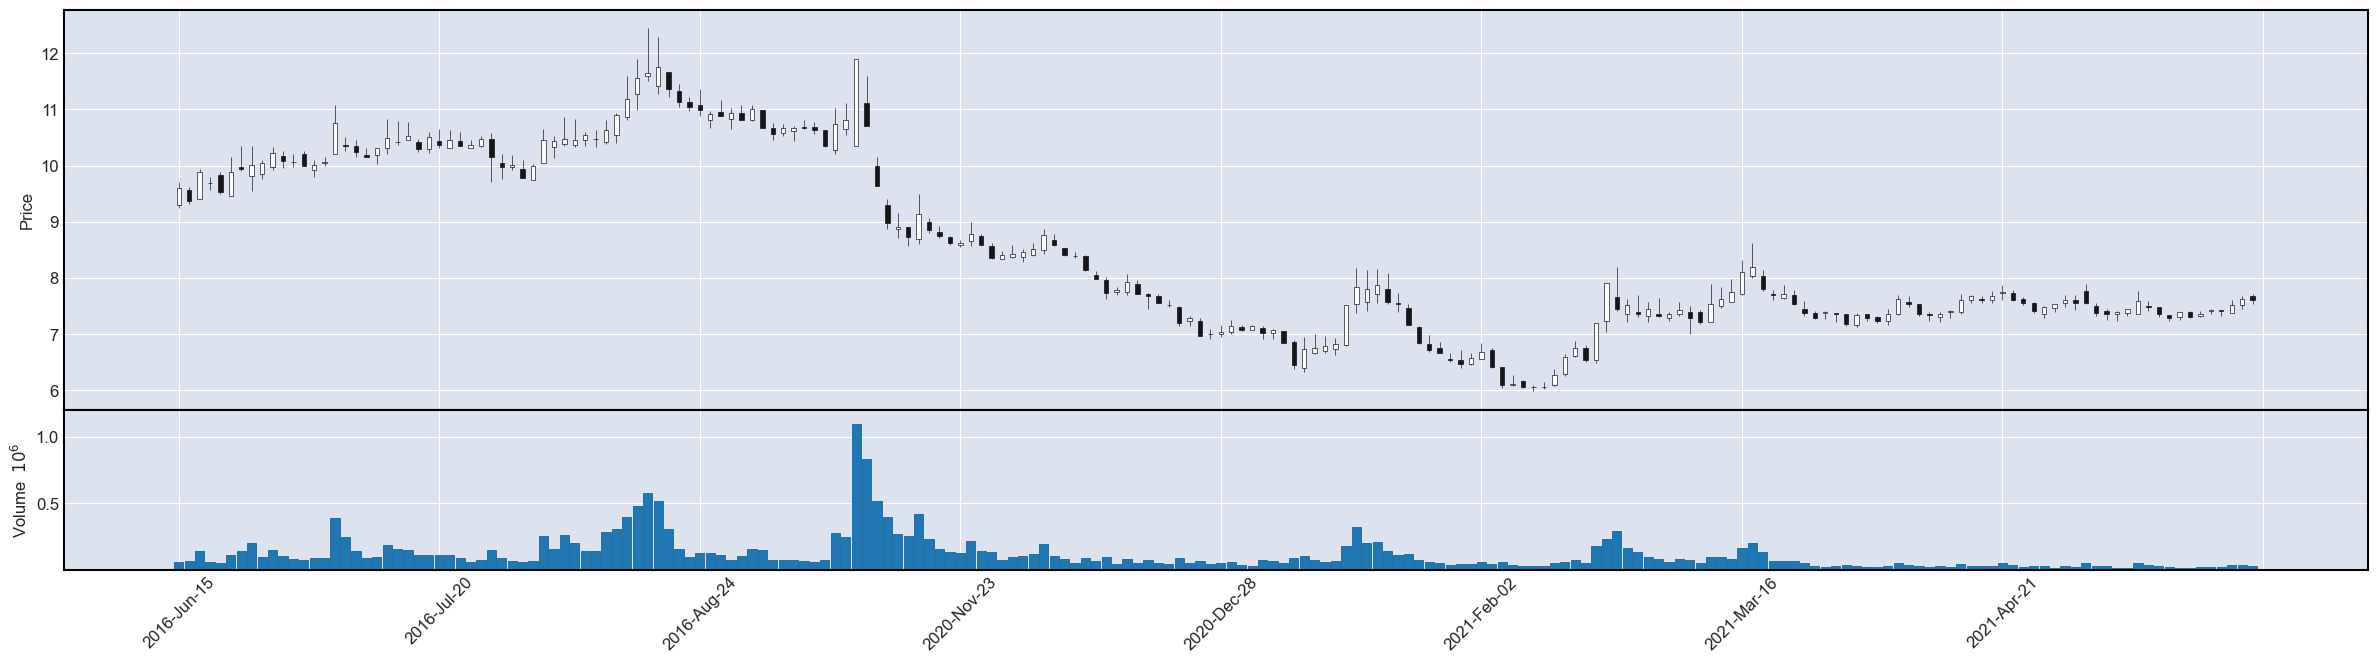

In [17]:
mpf.plot(df,type='candle',volume=True,figsize=(32,8))

# 绘制带有移动平均线的K线图

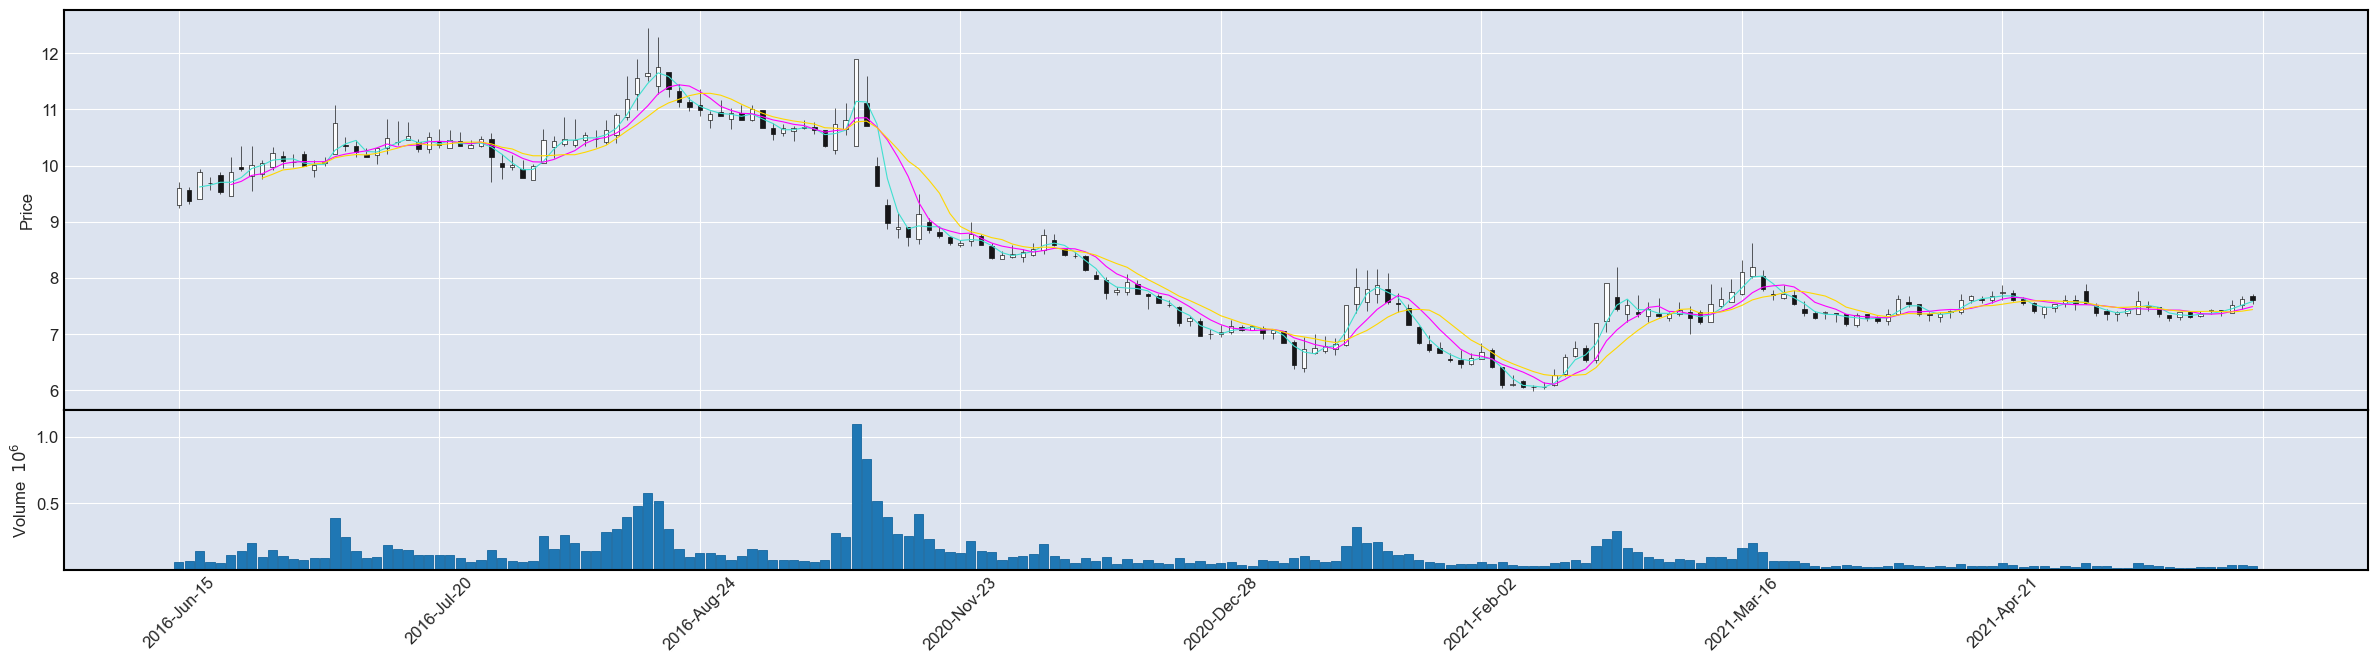

In [18]:
# mav: 3,6,9 天的移动平均
mpf.plot(df,type='candle',volume=True,mav=(3,6,9),figsize=(32,8))

# 绘制布林带图

In [19]:
# 计算布林带
df['20Day_MA'] = df['close'].rolling(window=10).mean()
df['20Day_Std'] = df['close'].rolling(window=10).std()
df['UpperBand'] = df['20Day_MA'] + df['20Day_Std']*2
df['LowerBand'] = df['20Day_MA'] - df['20Day_Std']*2

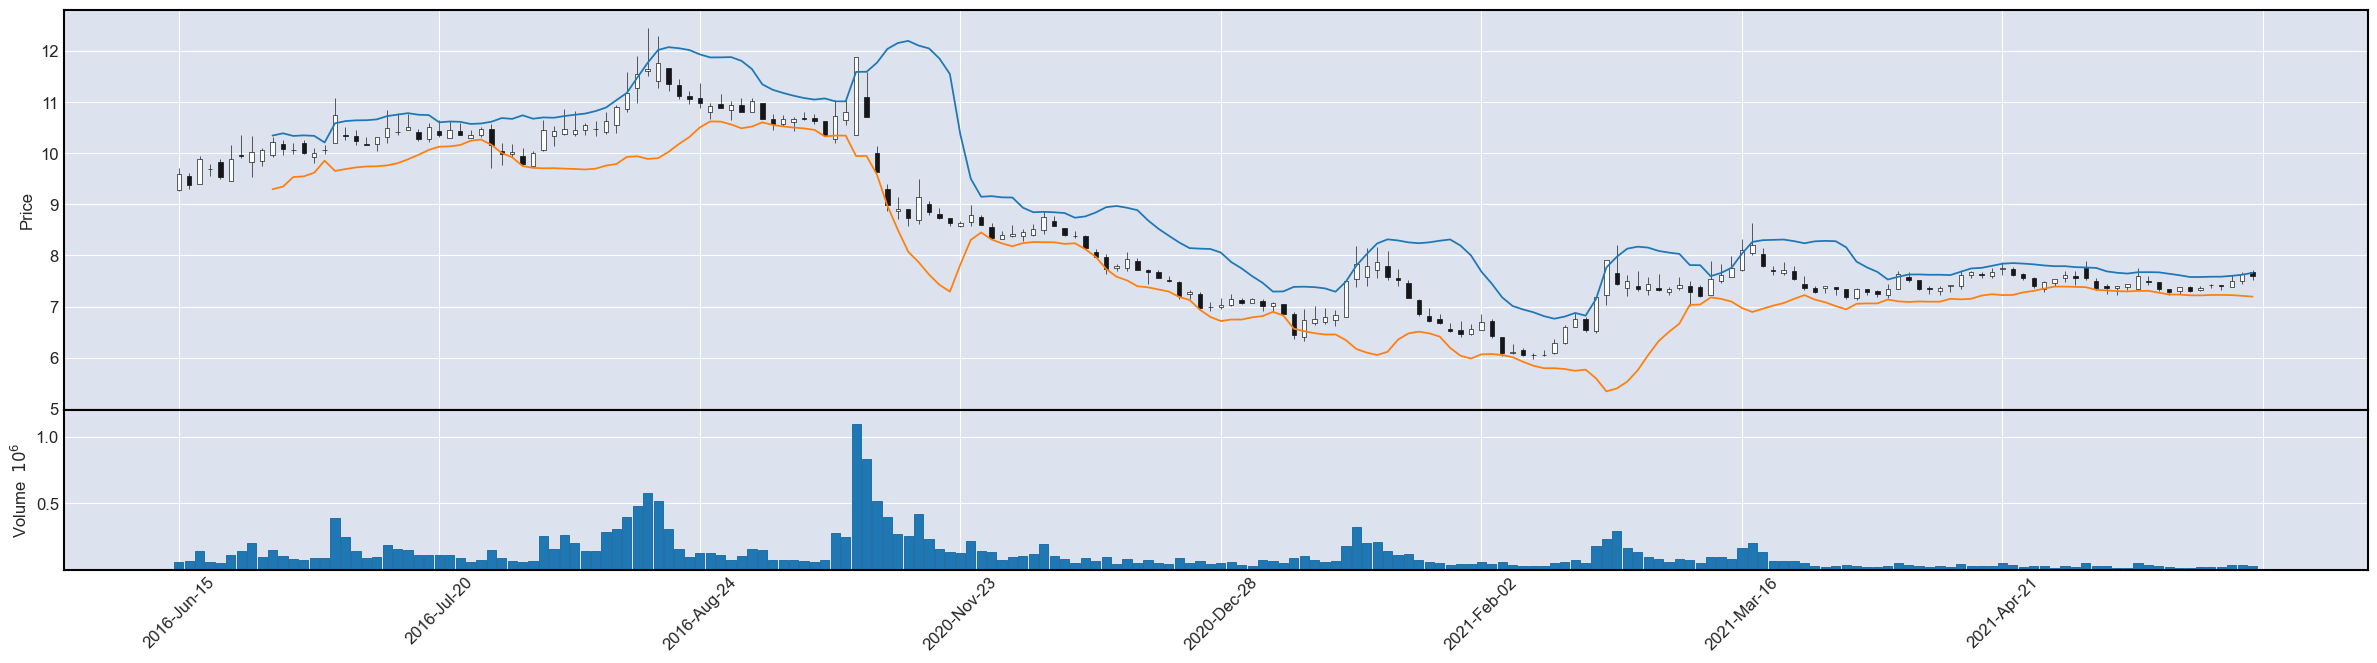

In [20]:
apds = [mpf.make_addplot(df['UpperBand']),mpf.make_addplot(df['LowerBand'])]
mpf.plot(df,type='candle',volume=True,addplot=apds,figsize=(32,8))

# 定制图表样式

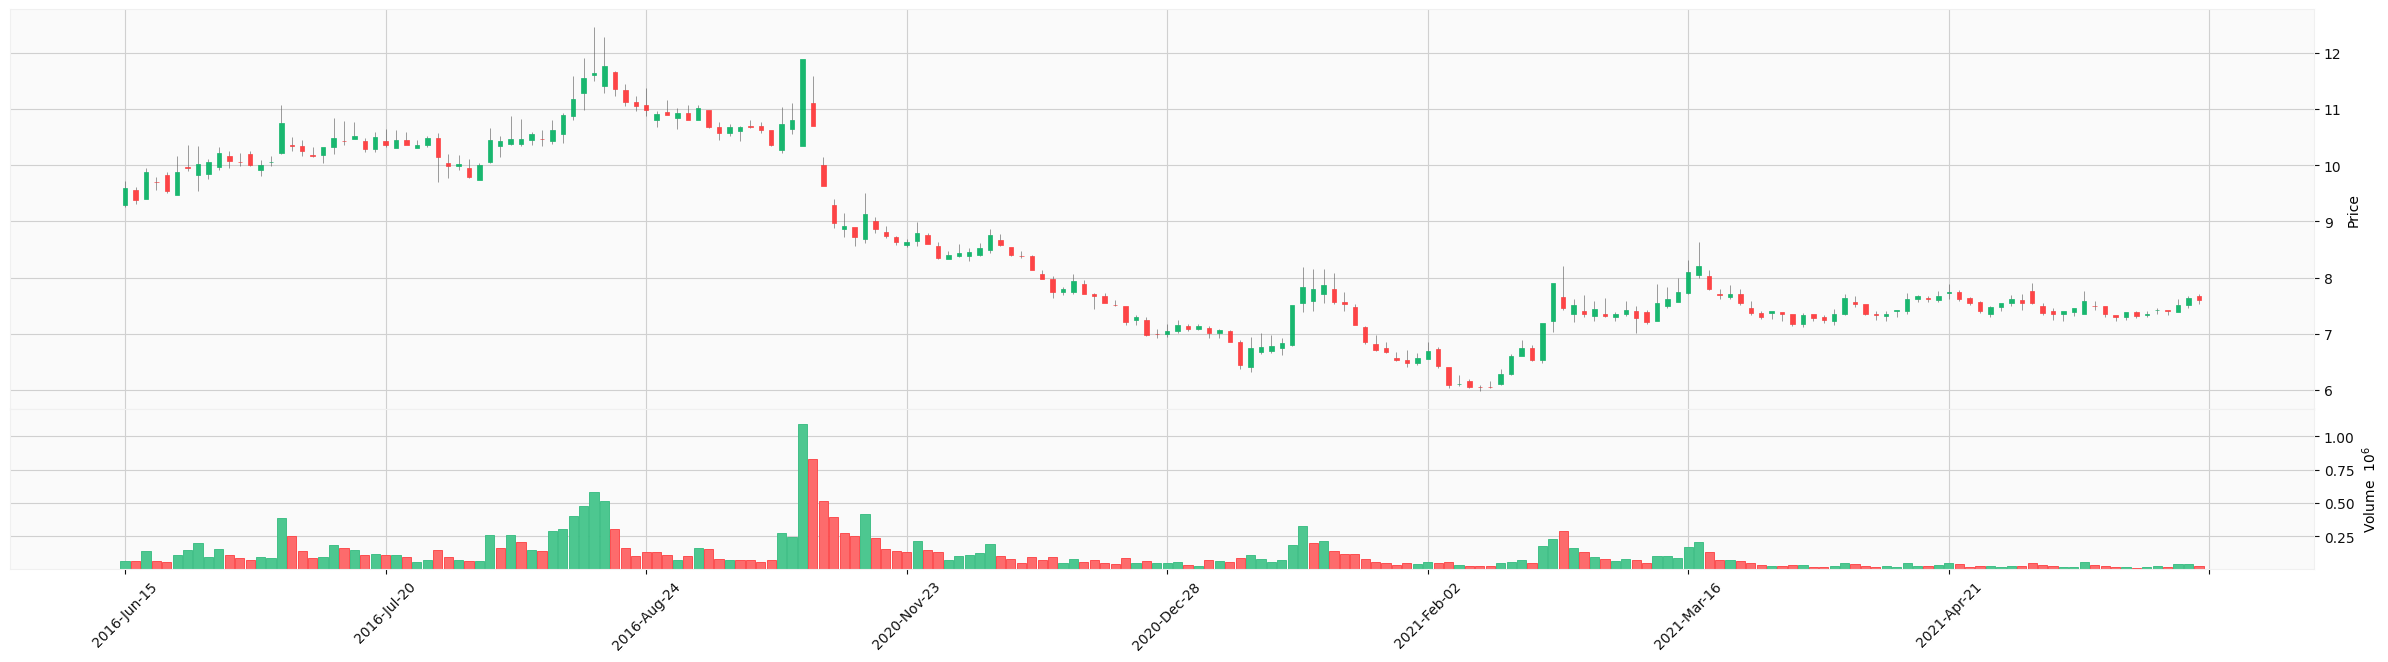

In [21]:
style = mpf.make_mpf_style(base_mpf_style='yahoo',rc={'font.size':10,'pcolor.shading': 'gouraud'})
mpf.plot(df,type='candle',volume=True,style=style,figsize=(32,8))

In [12]:
# plt.rcParams.keys()

In [25]:
df.head(2)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,volume,20Day_MA,20Day_Std,UpperBand,LowerBand
trade_date,,,,,,,,,,,,,,
2016-06-15,000029.SZ,9.2907,9.7166,9.2520,9.6004,9.4069,0.1935,2.0570,65167.33,64432.9253,NaN,NaN,NaN,NaN
2016-06-16,000029.SZ,9.5617,9.6198,9.3101,9.3778,9.6004,-0.2226,-2.3187,66655.41,65133.9543,NaN,NaN,NaN,NaN


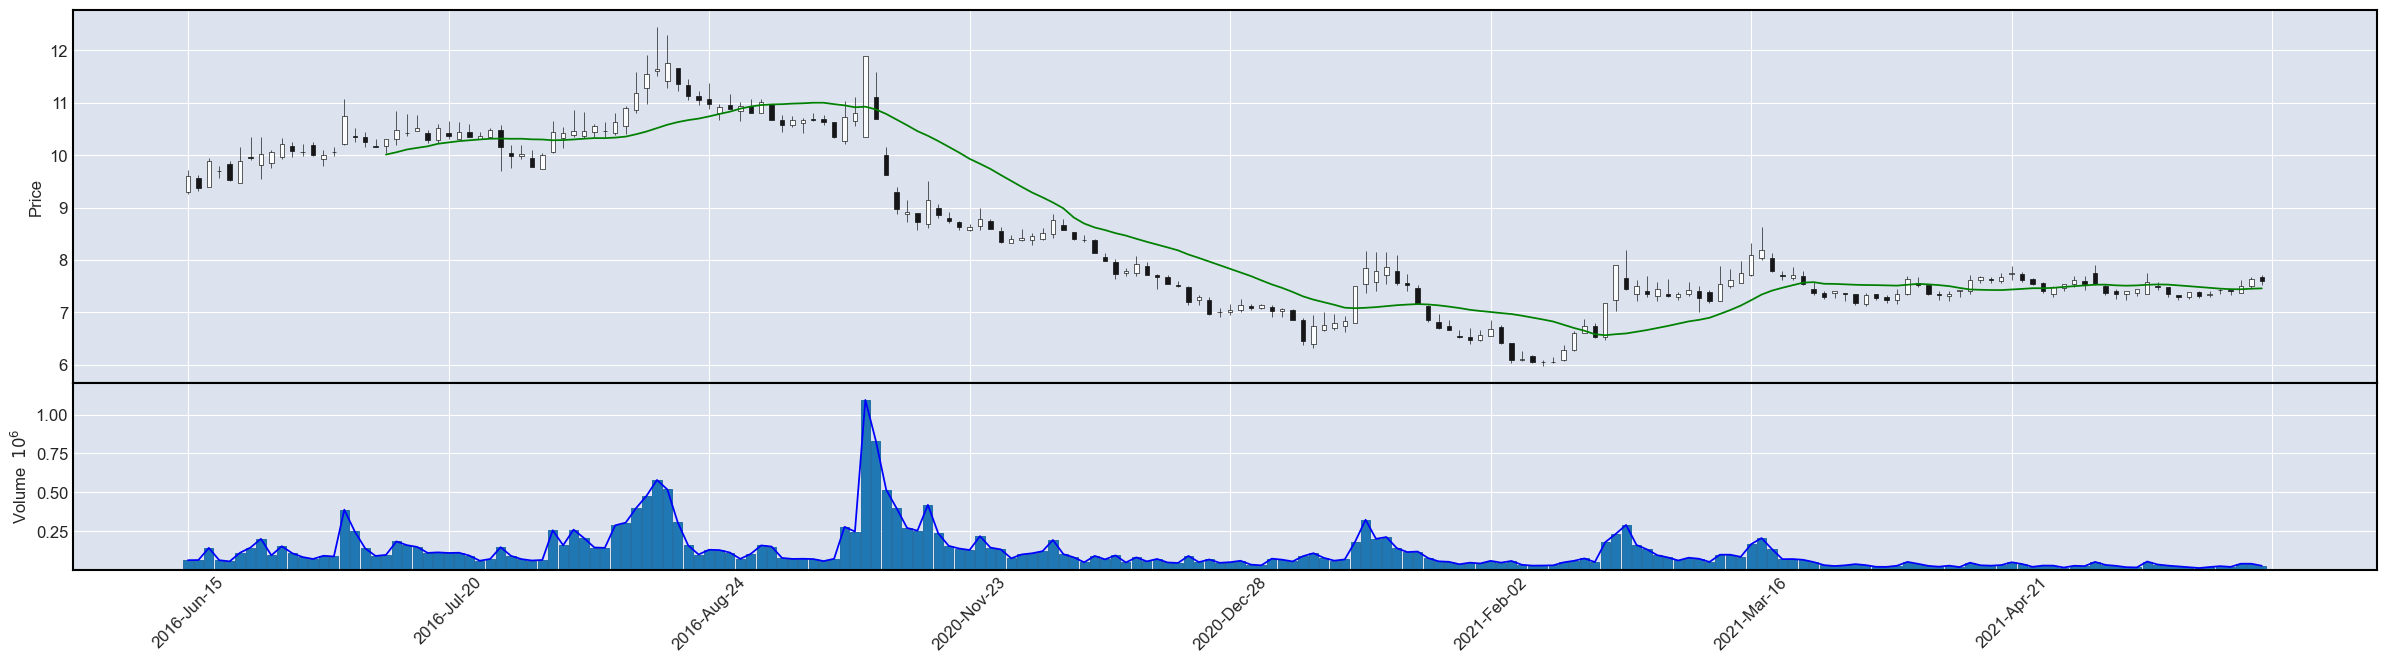

In [27]:
apds = [mpf.make_addplot(df['close'].rolling(window=20).mean(), panel=0, color='g'),  # 移动平均线
        mpf.make_addplot(df['volume'], panel=1, color='b')]  # 成交量
 
# 绘制包含多个子图的图表
mpf.plot(dtt, type='candle', volume=True, addplot=apds, panel_ratios=(2, 1),figsize=(32,8))

# 动态更新图表

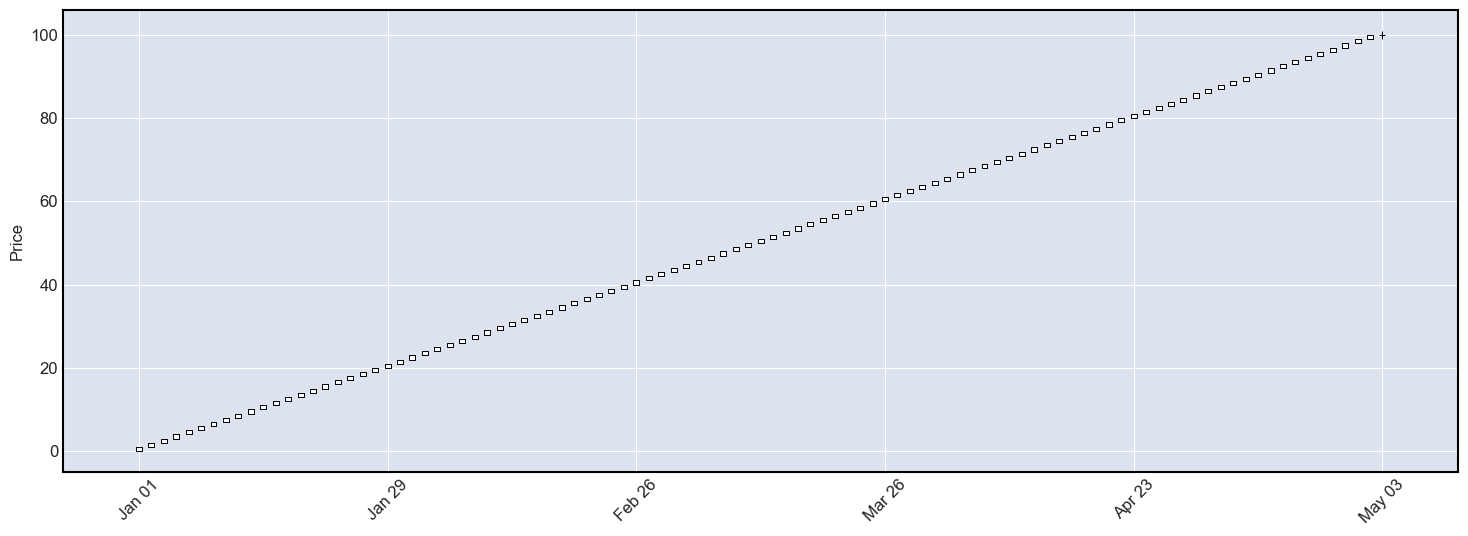

In [22]:
# 创建示例数据
data = {
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='B'),
    'Open': pd.Series(range(100)),
    'High': pd.Series(range(1, 101)),
    'Low': pd.Series(range(100)),
    'Close': pd.Series(range(1, 101)),
    'Volume': pd.Series(range(1000, 1100))
}
 
# 创建DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
 
# 创建图表对象
fig, axes = plt.subplots(figsize=(18,6))
# mpf.plot(df, type='candle', volume=True, returnfig=True)
for i in range(100, 200):
    new_data = {
        'Date': pd.date_range(start='2021-05-01', periods=1, freq='B'),
        'Open': pd.Series([i]),
        'High': pd.Series([i + 1]),
        'Low': pd.Series([i - 1]),
        'Close': pd.Series([i]),
        'Volume': pd.Series([1000 + i])
    }
    new_df = pd.DataFrame(new_data)
    # print(new_df)
    # print("*"*50)
    new_df.set_index('Date', inplace=True)
    df = pd.concat([df, new_df])
    # axes.clear()
    mpf.plot(df, type='candle',ax=axes)
    plt.pause(0.1)
    plt.show()

# 多股票对比

In [62]:
# # 获取股票数据
# tickers = ['AAPL', 'MSFT', 'GOOGL']
# data = {ticker: yf.download(ticker, start='2021-01-01', end='2021-01-20') for ticker in tickers}
 
# # 创建DataFrame
# dfs = {ticker: pd.DataFrame(data[ticker]) for ticker in tickers}
# for df in dfs.values():
#     df.reset_index(inplace=True)
#     df.set_index('Date', inplace=True)
 
# # 绘制对比图表
# apds = [mpf.make_addplot(dfs[ticker]['Close'], panel=i, color='g') for i, ticker in enumerate(tickers)]
# mpf.plot(dfs['AAPL'], type='line', addplot=apds, panel_ratios=(1, 1, 1), title='Multiple Stock Comparison')